https://juliastats.org/Distributions.jl/stable/extends/#Create-a-Distribution

In [1]:
module O

using Distributions
using SpecialFunctions

struct MyBeta{T<:Real} <: ContinuousUnivariateDistribution
    a::T
    b::T
end

Distributions.params(d::MyBeta) = (d.a, d.b)

function Distributions.quantile(d::MyBeta, p::Real)
    a, b = params(d)
    beta_inc_inv(a, b, p)[1]
end

end

@show O.quantile(O.MyBeta(3, 7), 0.5)
@show rand(O.MyBeta(3, 7), 3);

O.quantile(O.MyBeta(3, 7), 0.5) = 0.2862366680227827
rand(O.MyBeta(3, 7), 3) = [0.37561849661637015, 0.1492398012540337, 0.31392498211210185]


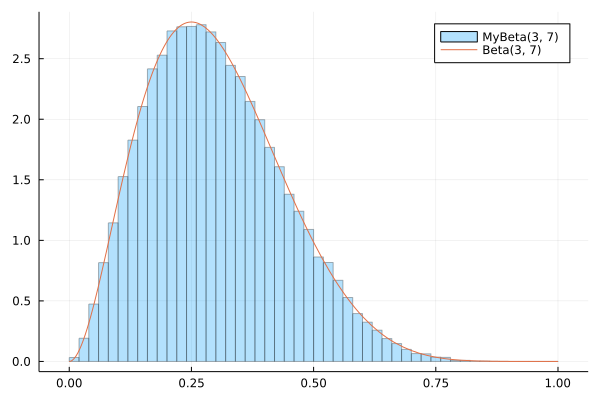

In [2]:
using Distributions
using StatsPlots

d = O.MyBeta(3, 7)
X = rand(d, 10^5)
histogram(X; norm=true, alpha=0.3, bin=0:0.02:1, label="MyBeta(3, 7)")
plot!(Beta(3, 7); label="Beta(3, 7)")